### Programming Assignment No.3: ***Logic Regression***
## <span style="color:#007BFF;">**Breast Cancer Classification**</span> <img src="Microscope.png" style="width:150px; height:150px; vertical-align:middle;">
#### Group Members:
**Bolinas**, Denisse Roxanne H.  
**De Leola**, Miguel S.  
**Ugates**, John Rhey T.  

### ***Import Neccesary Libraries***

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    f1_score, 
    precision_score, 
    recall_score, 
)

### ***Import Wisconsin Breast Cancer dataset.*** 

In [98]:
data = pd.read_csv('wdbc.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### ***Select columns that contain the word "mean" (mean values only)***

In [99]:
# Select columns that contain the word "mean" (mean values only)
mean_columns = [col for col in data.columns if 'mean' in col]
mean_columns = ['diagnosis'] + mean_columns

# Filter the dataset to include only the 'mean' columns
data = data[mean_columns]

### ***Remove rows with missing values***

In [100]:
# Remove rows with missing values
data.dropna(inplace=True)

### ***Separate features (X) and target (y)***

In [101]:
# Separate features (X) and target (y)
x = data[mean_columns].drop(columns=['diagnosis'])
y = data['diagnosis']

In [102]:
display(x.head())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


### ***Replacing M and B to 1 and 0***

In [103]:
# Replace 'M' with 1 and 'B' with 0 in the 'diagnosis' column
y = y.replace({'M': 1, 'B': 0})

# Convert the 'diagnosis' column to integers
y = y.astype(int)

display(y.head())

C:\Users\johnr\AppData\Local\Temp\ipykernel_5924\2724313874.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'M': 1, 'B': 0})


0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

### ***Identifying correlation among features***

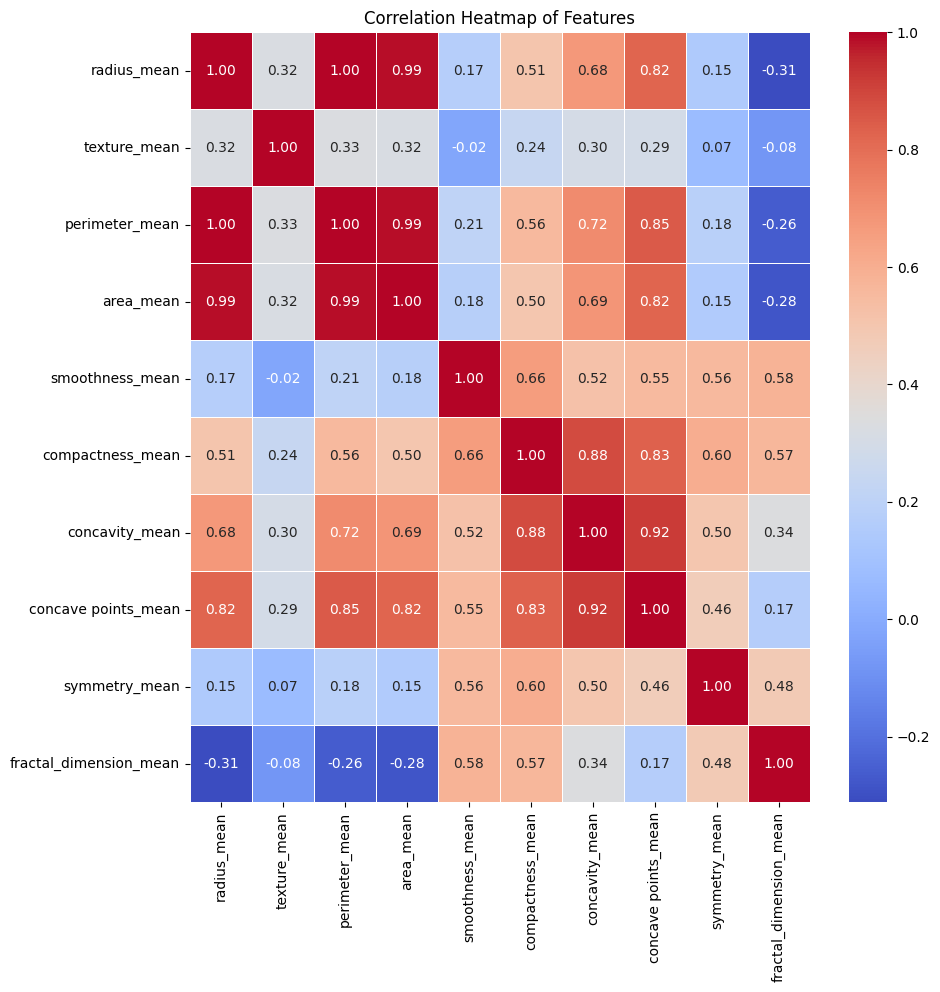

In [104]:
# Compute the correlation matrix for the feature set X
correlation_matrix = x.corr()

# Plot the heatmap using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

## ***General Guidelines***

### **1. Spliting the samples into 70% Training and 30% Testing at random.**

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)


### **2. Build a pipeline using the Standard Scaler and Logistic Regression**

In [106]:
# Create a standardScaler and logistic regression pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),        # Standard Scaler step
    ('log_reg', LogisticRegression())    # Logistic Regression step
])

# Fit the model on the training data
pipeline.fit(x_train, y_train)

# Use the model to predict the values for the test set
y_pred = pipeline.predict(x_test)


### **3. Use the default penalty settings of Logistic Regression:**

This is already handled by the default settings of LogisticRegression(). The default penalty in LogisticRegression is 'l2', which is the regularization method.

### **4. Model’s Training and Testing Accuracy & Feature Importance:**

In [107]:
train_accuracy = pipeline.score(x_train, y_train)  # Training accuracy
test_accuracy = pipeline.score(x_test, y_test)    # Testing accuracy

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Feature Importance (coefficients of the logistic regression)
feature_importance = pipeline.named_steps['log_reg'].coef_[0]  # Coefficients of Logistic Regression

# Displaying the features with their importance
feature_names = x.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

display(importance_df)

Training Accuracy: 0.9422
Testing Accuracy: 0.9415


,Feature,Importance
7,concave points_mean,1.625637
1,texture_mean,1.472499
3,area_mean,1.264395
4,smoothness_mean,1.132638
0,radius_mean,1.049994
2,perimeter_mean,0.940067
6,concavity_mean,0.785639
8,symmetry_mean,0.397152
9,fractal_dimension_mean,-0.303449
5,compactness_mean,-0.303636


The most important to least are:

* concave points_mean: 1.625637
* texture_mean: 1.472499
* area_mean: 1.264395
* smoothness_mean: 1.132638
* radius_mean: 1.049994
* perimeter_mean: 0.940067
* concavity_mean:	0.785639
* symmetry_mean: 0.397152
* fractal_dimension_mean: -0.303449
* compactness_mean: -0.303636

### **5. Generate a Confusion Matrix and calculate other metrics (F1-score, Precision, Recall, False alarm rate):**

Confusion Matrix:


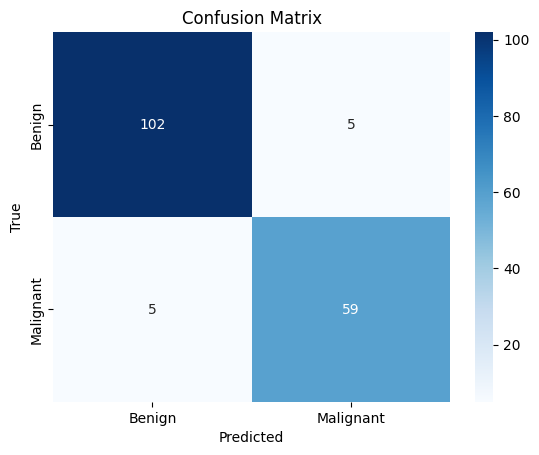

F1-score: 0.9219
Precision: 0.9219
Recall: 0.9219
False Alarm Rate: 0.0781


In [108]:
y_pred = pipeline.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix using a heatmap for better understanding
print("Confusion Matrix:")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate other metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# False Alarm Rate (FAR) = FP / (FP + TN)
false_alarm_rate = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1])

print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Alarm Rate: {false_alarm_rate:.4f}")


### **6. Plot the ROC Curve and report the AUC (Training and Testing data):**

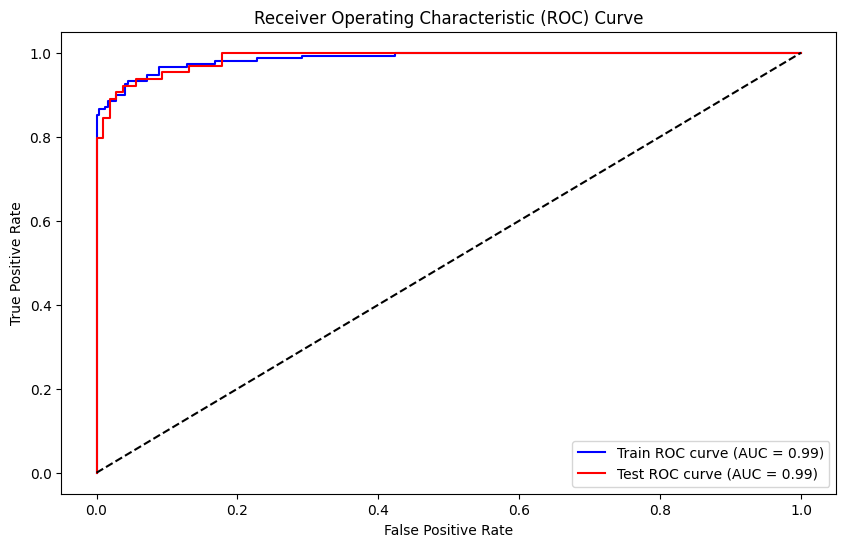

Training AUC: 0.9868
Testing AUC: 0.9877


In [109]:
# For Training Data
y_train_prob = pipeline.predict_proba(x_train)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)

# For Testing Data
y_test_prob = pipeline.predict_proba(x_test)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

# Plotting ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {roc_auc_score(y_train, y_train_prob):.2f})')
plt.plot(fpr_test, tpr_test, color='red', label=f'Test ROC curve (AUC = {roc_auc_score(y_test, y_test_prob):.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# AUC for both training and testing
print(f"Training AUC: {roc_auc_score(y_train, y_train_prob):.4f}")
print(f"Testing AUC: {roc_auc_score(y_test, y_test_prob):.4f}")


## ***Guide Questions***

#### **1. What steps are required to remove the "Sample code number" column?**

To remove the "Sample code number" column, you can use the `drop()` function in Pandas:
```python
data = data.drop(columns=['Sample code number'])
```
But the Sample code number doesn't exist but it is said that it's "ID," what we did is we didn't include it when compressing the code into selected mean features.

#### **2. How can the "Class" values be converted into binary (0 and 1) form in Python?**

To convert the "Class" values into binary form, you can use the replace() function in Pandas:
``` python
data['Class'] = data['Class'].replace({'M': 1, 'B': 0})
````
Here, 'M' is replaced with 1 and 'B' is replaced with 0.


#### **3. What is the importance of splitting the dataset into training and testing sets?**

Splitting the dataset into training and testing sets ensures that the model is evaluated on unseen data. This helps in assessing how well the model generalizes to new, real-world data, avoiding overfitting to the training data.

#### **4. Why is it necessary to use the stratify parameter in the train_test_split function?** 


The `stratify` parameter ensures that the proportion of classes in the training and testing sets remains the same as in the original dataset. This is especially important when the classes are imbalanced, as it ensures both sets contain representative distributions of the classes.

#### **5. What is logistic regression, and why is it suitable for this dataset?**

Logistic regression is a statistical model used for binary classification tasks. It estimates the probability of a binary outcome using a logistic function. It is suitable for this dataset because the target variable ("Class") is binary (benign or malignant), making logistic regression an appropriate choice for predicting tumor status.

#### **6. How can the training and testing accuracy of the logistic regression model be calculated?**

The accuracy of the model can be calculated using the `score()` method:
```python
train_accuracy = pipeline.score(x_train, y_train)
test_accuracy = pipeline.score(x_test, y_test)
```
This method returns the accuracy as the proportion of correct predictions in the training and testing sets.

#### **7. Which features in the dataset are most influential in determining the tumor status, and how can their importance be assessed?**

The most important feature in determining the tumor status is `concave points`, `texture`, and `area`. The following are their values:

* concave points_mean: 1.625637
* texture_mean: 1.472499
* area_mean: 1.264395
* smoothness_mean: 1.132638
* radius_mean: 1.049994
* perimeter_mean: 0.940067
* concavity_mean:	0.785639
* symmetry_mean: 0.397152
* fractal_dimension_mean: -0.303449
* compactness_mean: -0.303636

#### **8. How is a confusion matrix generated, and what does it represent? **


A confusion matrix can be generated using `confusion_matrix()` from `sklearn.metrics`:
``` python
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
```
It represents the counts of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN), which are used to evaluate the performance of the classifier.

#### **9. How are precision, recall, F1-score, and false alarm rate calculated from the confusion matrix?**

From the confusion matrix, the following metrics can be calculated:

- **Precision (Positive Predictive Value):**  
  $$ \text{Precision} = \frac{TP}{TP + FP} $$  
  Where:  
  - \( TP \) = True Positives  
  - \( FP \) = False Positives  

- **Recall (Sensitivity or True Positive Rate):**  
  $$ \text{Recall} = \frac{TP}{TP + FN} $$  
  Where:  
  - \( TP \) = True Positives  
  - \( FN \) = False Negatives  

- **F1-Score** (the harmonic mean of precision and recall):  
  $$ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

- **False Alarm Rate (False Positive Rate):**  
  $$ \text{False Alarm Rate} = \frac{FP}{FP + TN} $$  
  Where:  
  - \( FP \) = False Positives  
  - \( TN \) = True Negatives

```Python

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
false_alarm_rate = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1])
```

#### **10. Why are these metrics important for evaluating the performance of a classifier?**

These metrics provide more detailed insights into the classifier's performance:

* `Precision`: Indicates how many of the predicted positives were actually positive.
* `Recall`: Indicates how many actual positives were correctly identified.
* `F1-score`: A balanced measure of precision and recall.
* `False Alarm Rate`: Measures the rate of incorrect positive predictions, which is important when the cost of false positives is high.

#### **11. What is an ROC curve, and how is it plotted for a logistic regression model?** 


An `ROC (Receiver Operating Characteristic)` curve is plotted by comparing the true positive rate (TPR) with the false positive rate (FPR) at various decision thresholds. It helps evaluate the performance of a model across all possible thresholds. The closer the ROC curve is to the top-left corner, the better the model’s performance, as it indicates a higher true positive rate and a lower false positive rate. A steeper curve generally indicates a more effective model.

#### **12. How is the AUC (Area Under the Curve) calculated, and what does it signify about the model's** 


AUC (Area Under the Curve) is calculated using `roc_auc_score()`:

``` python
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_prob)
```
`AUC` indicates the model's ability to distinguish between positive and negative classes. An AUC close to 1 means the model performs well, while an AUC closer to 0.5 indicates poor performance.

#### **13. How do the training and testing ROC curves compare, and what insights can be derived from this comparison?** 

By comparing the ROC curves of the training and testing datasets, you can see if the model is overfitting. If the ROC curve for the training data is much better than for the testing data, it indicates that the model might be overfitting to the training data. A similar ROC curve for both datasets suggests the model is generalizing well.

#### **14. What challenges did you encounter during the preprocessing or model training phases, and how did you address them?**

One of the challenges we encountered during the preprocessing phase was using `!pip install ucimlrepo` to load the dataset. Initially, we used `pip install` to fetch the data, but we noticed that the first row, which contains the column titles, was not visible in the output. To address this, we downloaded the data and converted the `wdbc.data` file into a CSV format and manually edited the first row to match the column titles from the Kaggle reference. After this, we manually separated the data into 'mean', 'SE', and 'worst' categories as required for the analysis.

#### **15. If the model's performance is not satisfactory, what adjustments could be made to improve it?** 


If the model's performance is not satisfactory, we can try tuning hyperparameters, such as regularization strength or the solver. Improving feature engineering by selecting relevant features or normalizing the data could help. Additionally, exploring other algorithms like decision trees or support vector machines might improve results. Collecting more data or addressing class imbalance can also improve performance.